Multitaper Spectrogram Properties: 
     Spectral Resolution: 1.5Hz
     Window Length: 4.0s
     Window Step: 1.0s
     Time Half-Bandwidth Product: 3
     Number of Tapers: 5
     Frequency Range: 0-25Hz
     Detrend: constant


 Multitaper compute time: 0.39289380609989166 seconds


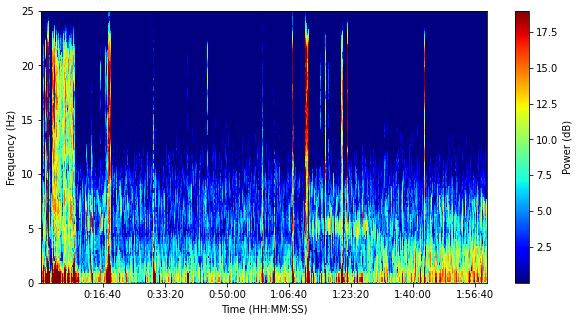

In [7]:
from multitaper_spectrogram_python import multitaper_spectrogram  # import multitaper_spectrogram function from the multitaper_spectrogram_python.py file
import numpy as np  # import numpy
from scipy.signal import chirp  # import chirp generation function

# Set spectrogram params
fs = 100  # Sampling Frequency
frequency_range = [0, 25]  # Limit frequencies from 0 to 25 Hz
time_bandwidth = 3  # Set time-half bandwidth
num_tapers = 5  # Set number of tapers (optimal is time_bandwidth*2 - 1)
window_params = [4, 1]  # Window size is 4s with step size of 1s
min_nfft = 0  # No minimum nfft
detrend_opt = 'constant'  # detrend each window by subtracting the average
multiprocess = True  # use multiprocessing
cpus = 10  # use 3 cores in multiprocessing
weighting = 'unity'  # weight each taper at 1
plot_on = True  # plot spectrogram
clim_scale = True # do not auto-scale colormap
verbose = True  # print extra info
xyflip = False  # do not transpose spect output matrix

from pyedflib import highlevel  # to install this package using pip: 'pip install pyEDFlib' 
                                # to install this package using conda: 'conda install -c conda-forge pyedflib' 

signals, signal_headers, header = highlevel.read_edf('test.edf')  # reads in the signal data, header for each signal, and the overall edf header from test.edf

data = signals[5]  # in this edf the 3rd signal is data from the C3 electrode (look at signal_headers to determine the label for each signal in your edf)
#C3_fs = signal_headers[2]['sample_rate']  # Extract the sampling frequency for the C3 signal

# C3_data will be the 'data' argument to multitaper_spectrogram
# C3_fs will be the 'fs' argument to multitaper_spectrogram

# Compute the multitaper spectrogram
spect, stimes, sfreqs = multitaper_spectrogram(data, fs, frequency_range, time_bandwidth, num_tapers, window_params, min_nfft, detrend_opt, multiprocess, cpus, weighting, plot_on, clim_scale, verbose, xyflip)